<a href="https://colab.research.google.com/github/sudipto291088/Projects/blob/main/Aptech_YoE_vs_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [22]:
## Note: After uploading the file, click on the 'Raw' option and then copy the link...

df = pd.read_csv('https://raw.githubusercontent.com/sudipto291088/Projects/refs/heads/main/Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [23]:
type(df)

pandas.core.frame.DataFrame

In [25]:
df.shape

(30, 2)

In [26]:
df.size

60

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [28]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [33]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [31]:
## As we notice no null values


df.isnull().sum()

,0
YearsExperience,0
Salary,0


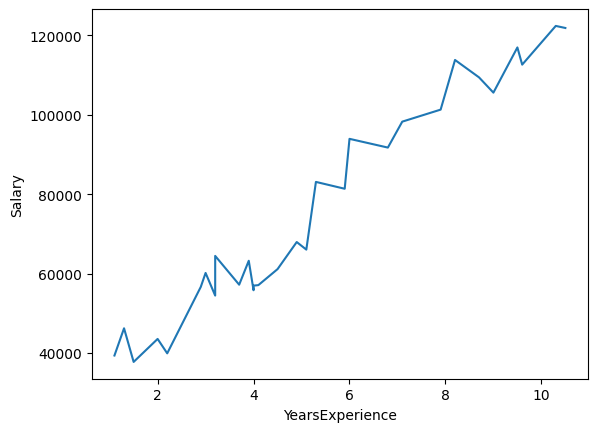

In [36]:
plt.plot(df['YearsExperience'],df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

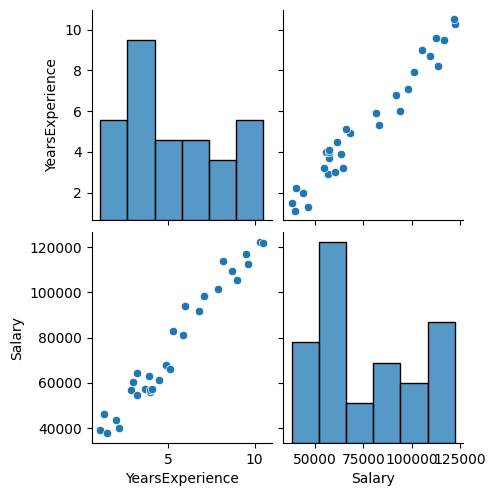

In [43]:
sns.pairplot(df)

In [44]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [46]:
X.shape

(30, 1)

In [47]:
y.shape

(30,)

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=20)

In [49]:
len(X_train)

22

In [50]:
len(X_test)

8

In [51]:
len(y_train)

22

In [52]:
len(y_test)

8

# Creating a Model

In [53]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [55]:
print('Intercept: ',lr.intercept_)
print('Coefficient: ',lr.coef_)

Intercept:  25747.081908652384
Coefficient:  [9621.9864123]


In [56]:
y_pred = lr.predict(X_test)

In [58]:
print(len(y))
print(len(y_pred))

30
8


In [61]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Error':np.abs(y_test-y_pred)})
df1

,Actual,Predicted,Error
0,57081.0,65197.226199,8116.226199
1,39891.0,46915.452016,7024.452016
2,46205.0,38255.664245,7949.335755
3,63218.0,63272.828917,54.828917
4,121872.0,126777.939238,4905.939238
5,56957.0,64235.027558,7278.027558
6,81363.0,82516.801741,1153.801741
7,112635.0,118118.151467,5483.151467


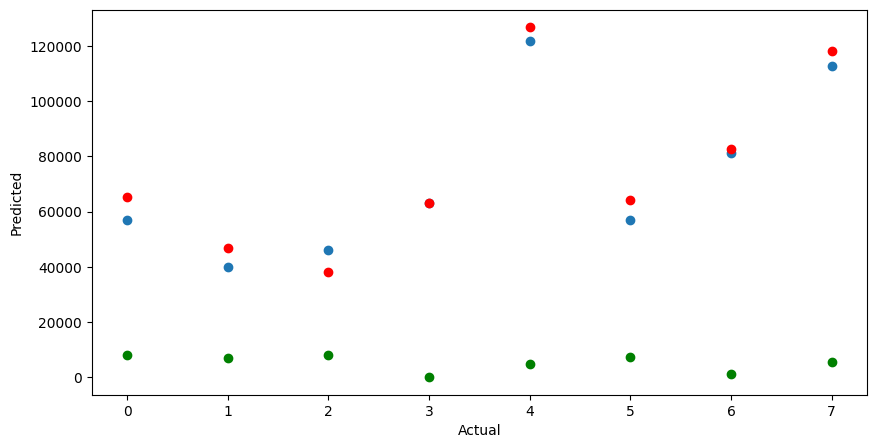

In [105]:
plt.figure(figsize=(10,5))
plt.scatter(df1.index,df1['Actual'])
plt.scatter(df1.index,df1['Predicted'],color='red')
plt.scatter(df1.index,df1['Error'],color='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

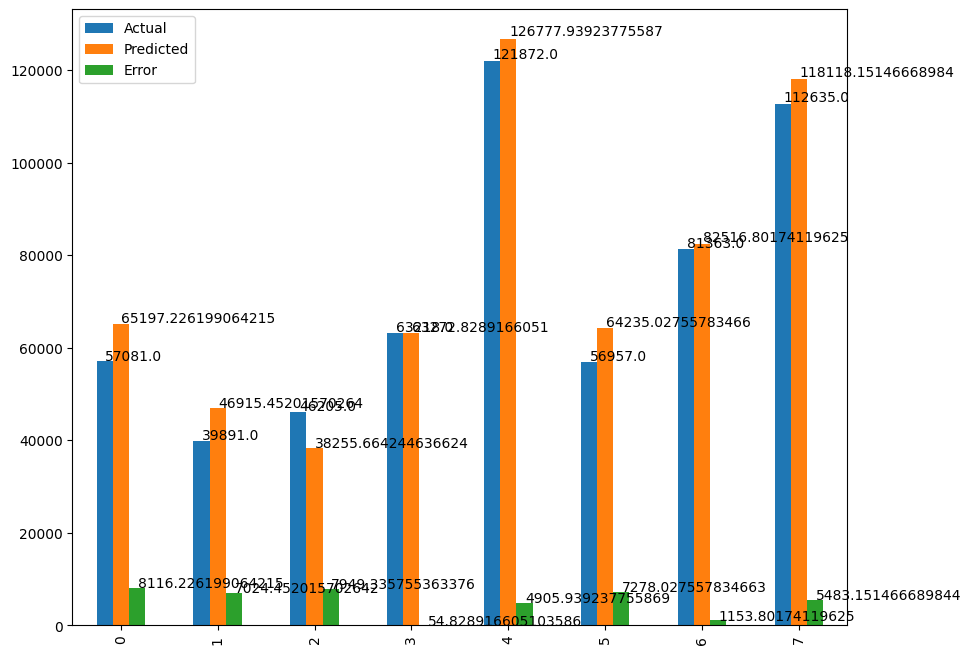

In [104]:
## matplotlib.pyplot.annotate(text, xy, xytext=None, xycoords='data', textcoords=None, arrowprops=None, annotation_clip=None, **kwargs)


ax = df1.plot(kind='bar',figsize=(10,8))

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+.09 * 1.005, p.get_height() * 1.005))

plt.show()

In [74]:
print('Mean Absolute Error',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 Score',r2_score(y_test,y_pred))

Mean Absolute Error 5245.720361276495
Mean Squared Error 35855641.54983548
Root Mean Squared Error 5987.958045096465
R2 Score 0.9555082242407429


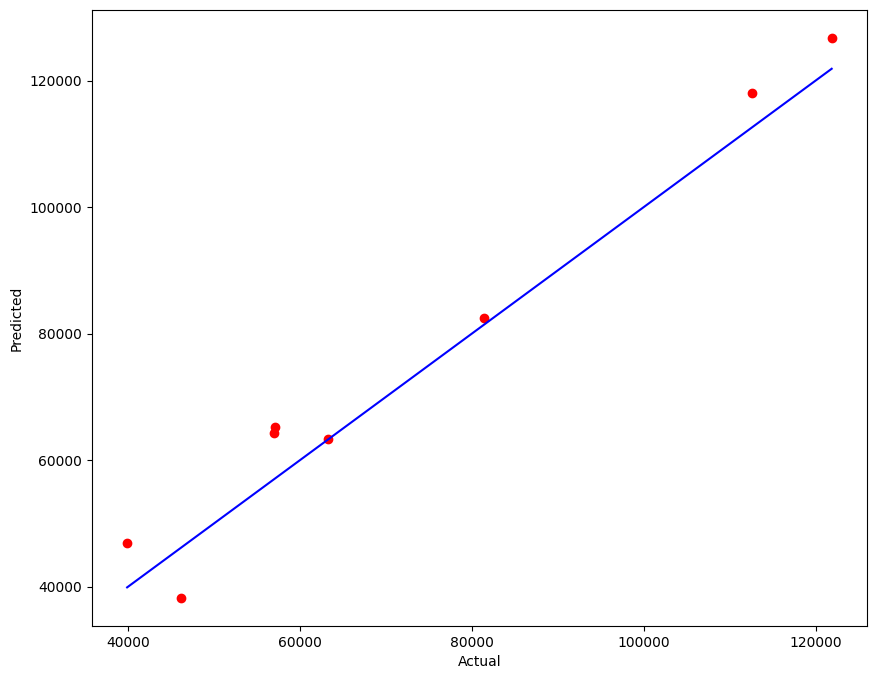

In [112]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred,color='red')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

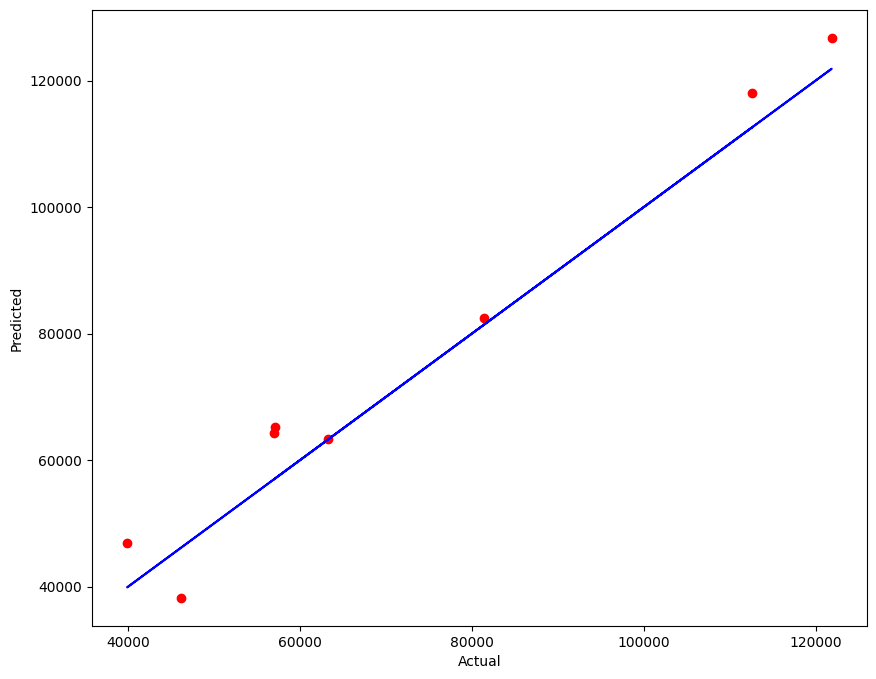

In [115]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

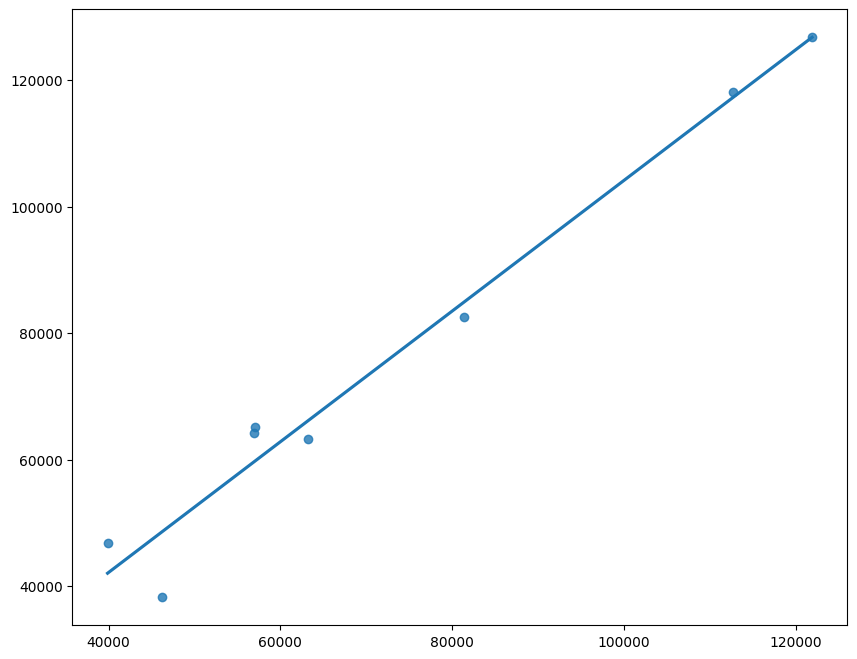

In [116]:
plt.figure(figsize=(10,8))
sns.regplot(x=y_test,y=y_pred,ci=None)
plt.show()

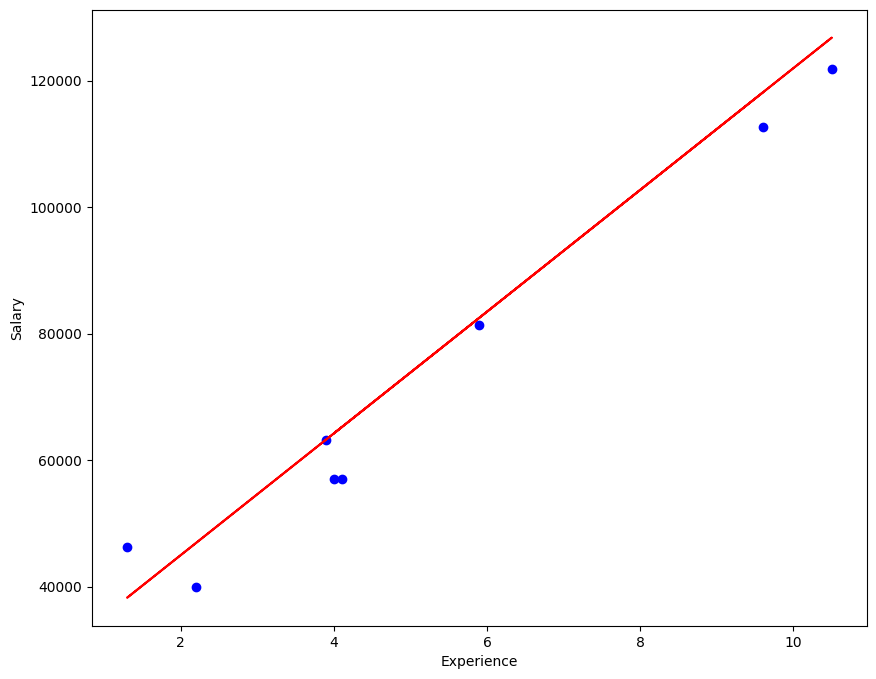

In [118]:
plt.figure(figsize=(10,8))
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_test,y_pred,color='red')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

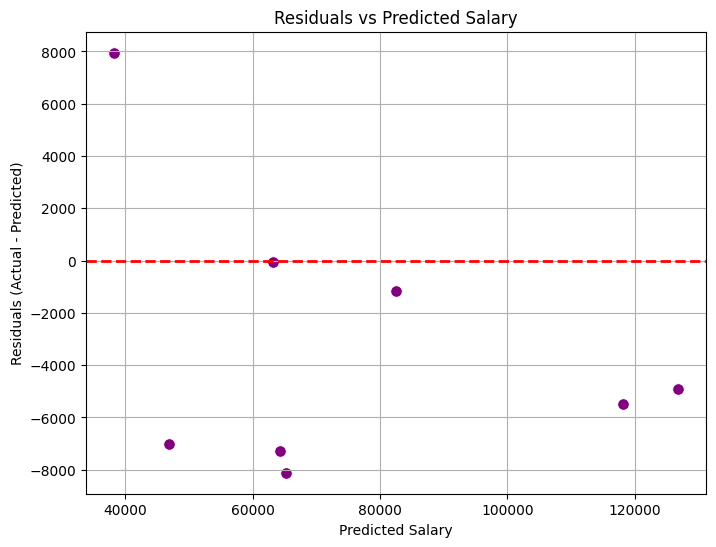

In [121]:
# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, color='purple', s=70)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # reference line at 0
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted Salary")
plt.grid(True)
plt.show()